In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import math
from statistics import median
import seaborn as sns
import re
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [25]:
dffilm.drop(['belongs_to_collection','genres','homepage',
            'imdb_id','spoken_languages','overview','title','poster_path','production_companies',
            'production_countries','original_title','tagline','Keywords','cast','crew'], axis=1, inplace=True)
dffilm.head()

,id,budget,original_language,popularity,release_date,runtime,status,revenue
0,391,6843500,it,3.800073,12/22/12,0.0,Released,10703234
1,592,0,ru,0.402368,12/4/03,0.0,Released,234748
2,925,0,es,1.926826,11/15/13,0.0,Released,850259
3,978,11000000,it,5.010563,10/27/11,0.0,Released,12935800
4,1256,0,it,1.623440,8/25/75,0.0,Released,39598448


In [26]:

dffilm.revenue

0        10703234
1          234748
2          850259
3        12935800
4        39598448
          ...    
2995    122700000
2996     71000000
2997       871279
2998        31000
2999        65335
Name: revenue, Length: 3000, dtype: int64

In [27]:
#Data preparation

X_releasedate =dffilm
for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    X_releasedate.release_date[m]= dt.month
    
for i in range(0,len(dffilm.original_language)):
    if dffilm.original_language[i]== 'en':
        X_releasedate.original_language[i] = 1
    else:
        X_releasedate.original_language[i] = 0
        

for j in range(0,len(dffilm.status)):
    if dffilm.status[j]== 'Released':
        X_releasedate.status[j] = 1
    else:
        X_releasedate.status[j] = 0        
        
X_releasedate =X_releasedate[X_releasedate['runtime'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] > 100] 
X_releasedate =X_releasedate[X_releasedate['budget'] !=0]
X_releasedate

,id,budget,original_language,popularity,release_date,runtime,status,revenue
17,2576,250000,1,4.297654,12,62.0,1,1000000
19,188,259000,1,0.722511,11,65.0,1,921000
20,488,4500000,0,1.833185,3,65.0,1,3468423
21,2278,8000000,0,7.321152,10,66.0,1,292279
22,1764,250000,1,8.168456,1,68.0,1,2500000
...,...,...,...,...,...,...,...,...
2994,1303,44000000,1,4.393576,11,219.0,1,3484331
2995,524,13000000,1,11.147040,10,220.0,1,122700000
2996,1923,31115000,1,8.591238,6,248.0,1,71000000
2997,1212,18000000,1,4.558075,5,338.0,1,871279


In [28]:
X_releasedate['release_date']=X_releasedate.release_date.astype('int64')
X_releasedate['original_language']=X_releasedate.original_language.astype('int64')
X_releasedate['status']=X_releasedate.status.astype('int64')

In [29]:
X = X_releasedate.dropna().copy()
X.head()

,id,budget,original_language,popularity,release_date,runtime,status,revenue
17,2576,250000,1,4.297654,12,62.0,1,1000000
19,188,259000,1,0.722511,11,65.0,1,921000
20,488,4500000,0,1.833185,3,65.0,1,3468423
21,2278,8000000,0,7.321152,10,66.0,1,292279
22,1764,250000,1,8.168456,1,68.0,1,2500000


In [30]:

X=X_releasedate.dropna()

X


,id,budget,original_language,popularity,release_date,runtime,status,revenue
17,2576,250000,1,4.297654,12,62.0,1,1000000
19,188,259000,1,0.722511,11,65.0,1,921000
20,488,4500000,0,1.833185,3,65.0,1,3468423
21,2278,8000000,0,7.321152,10,66.0,1,292279
22,1764,250000,1,8.168456,1,68.0,1,2500000
...,...,...,...,...,...,...,...,...
2993,1915,56000000,1,5.374563,2,214.0,1,12923936
2994,1303,44000000,1,4.393576,11,219.0,1,3484331
2995,524,13000000,1,11.147040,10,220.0,1,122700000
2996,1923,31115000,1,8.591238,6,248.0,1,71000000


In [31]:
y = X["revenue"]
y

17        1000000
19         921000
20        3468423
21         292279
22        2500000
          ...    
2993     12923936
2994      3484331
2995    122700000
2996     71000000
2997       871279
Name: revenue, Length: 2161, dtype: int64

In [32]:
X.drop("revenue", axis=1, inplace=True)
X

,id,budget,original_language,popularity,release_date,runtime,status
17,2576,250000,1,4.297654,12,62.0,1
19,188,259000,1,0.722511,11,65.0,1
20,488,4500000,0,1.833185,3,65.0,1
21,2278,8000000,0,7.321152,10,66.0,1
22,1764,250000,1,8.168456,1,68.0,1
...,...,...,...,...,...,...,...
2993,1915,56000000,1,5.374563,2,214.0,1
2994,1303,44000000,1,4.393576,11,219.0,1
2995,524,13000000,1,11.147040,10,220.0,1
2996,1923,31115000,1,8.591238,6,248.0,1


In [33]:
# Splitting into Train and Test sets
#X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=78)

In [34]:
X_test
y_train
y_test

y_train



620      12314651
2746     41895491
1774     22179430
2543     81452156
1141        56825
          ...    
870        253527
2990       393816
93        5602431
2745    863416141
759      77112176
Name: revenue, Length: 1620, dtype: int64

In [35]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [36]:
#Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [37]:
predictions = rf_model.predict(X_test)
print(predictions)

[5.70790398e+08 5.41149765e+07 2.82356517e+08 8.41182241e+07
 2.18105144e+07 8.13858908e+06 7.51184552e+07 7.80154442e+07
 6.48361584e+07 4.07354290e+07 1.22171216e+08 1.61434002e+07
 1.33004093e+08 2.94212547e+07 6.37904303e+08 1.87273588e+08
 7.62922554e+07 6.20070518e+06 1.23990324e+08 3.76841030e+07
 6.93962002e+06 2.51439719e+07 5.35125285e+07 1.29825416e+08
 1.72941887e+08 7.52600242e+07 1.01418578e+08 1.07279000e+08
 8.33450223e+07 4.64681670e+07 1.41575798e+08 6.57873699e+07
 5.75997414e+06 8.82766397e+07 3.86510303e+08 3.77004615e+08
 9.56584862e+07 4.25338603e+08 9.61463166e+07 9.73568601e+06
 1.45655769e+08 1.01775628e+07 1.39117976e+08 3.02571269e+07
 1.27680846e+08 5.15034827e+07 5.33082192e+07 1.30660978e+07
 2.87130145e+07 4.43175135e+07 1.61934315e+08 5.45453644e+07
 4.72753940e+07 6.33440909e+07 2.16357309e+08 7.92565561e+07
 1.00588162e+08 3.57256357e+07 2.82163932e+07 2.16455690e+08
 1.38778936e+08 8.19767849e+07 3.00659513e+07 5.26900532e+08
 7.63268920e+07 3.320661

In [38]:
#print(Random forest predictive ability (r^2): {rf_model.score(X_test, y_test):.3f})

print (f'Train Accuracy - : {rf_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_model.score(X_test,y_test):.3f}')

SyntaxError: invalid syntax (2623631743.py, line 1)

In [39]:
# Mean error calculations
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Calculate absolute errors
errors = abs(predictions - y_test.values)

# Calculate mean absolute percentage error
mape = 100 * (errors / y_test.values)

# Calculate and display percent accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 52554536.10483919
Mean Squared Error: 8688340166301352.0
Root Mean Squared Error: 93211266.30564222
Accuracy: -10528.12 %


In [40]:
y_train

620      12314651
2746     41895491
1774     22179430
2543     81452156
1141        56825
          ...    
870        253527
2990       393816
93        5602431
2745    863416141
759      77112176
Name: revenue, Length: 1620, dtype: int64

In [41]:

print("Mean revenue: %.2f" % y_train.mean())
print("Median revenue: %.2f" % y_train.median())



Mean revenue: 88953367.56
Median revenue: 29834848.00


/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


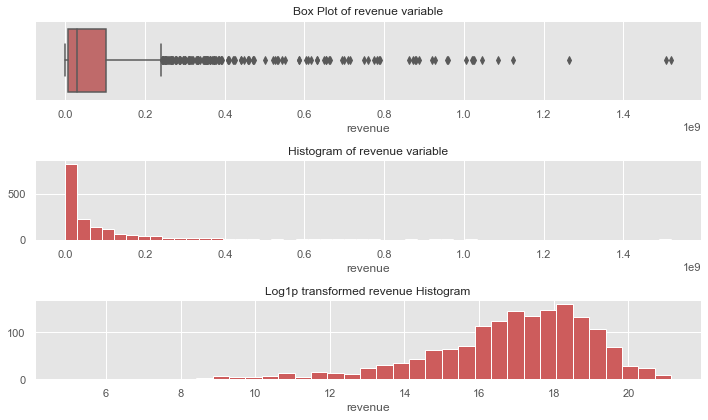

In [42]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=y_train, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of revenue variable")
sns.distplot(a=y_train, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of revenue variable")
sns.distplot(a=np.log1p(y_train), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

In [92]:
#X_train.dtypes
#X_test
#y_train
#y_test
X.dtypes

id                     int64
original_language      int64
popularity           float64
release_date           int64
runtime              float64
status                 int64
dtype: object

In [93]:
dffilm['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64